<a href="https://colab.research.google.com/github/Shindora/DE-test/blob/main/primeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q.1

In [1]:
# CREATING THE TABLE
import sqlite3

conn = sqlite3.connect('q1.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS Performance''')
conn.execute('''
CREATE TABLE IF NOT EXISTS Performance(AthleteId integer primary key, 
                      Gender text, 
                      Country text, 
                      Score integer);''')
conn.execute(""" INSERT INTO Performance VALUES (1, "Female", "VN", 10); """)
conn.execute(""" INSERT INTO Performance VALUES (2, "Male", "USA", 15); """)
conn.execute(""" INSERT INTO Performance VALUES (3, "Male", "CN", 11); """)
conn.execute(""" INSERT INTO Performance VALUES (4, "Male", "USA", 9); """)
conn.commit()
cursor = conn.execute(""" SELECT MAX(Score) as '2nd_score'
                          FROM Performance
                          WHERE Score < ( SELECT MAX(Score) from Performance); """)
for row in cursor:
  print(row)
conn.close()

Opened database successfully
(11,)


#Q.2

In [2]:
# CREATING THE TABLE
import sqlite3

conn = sqlite3.connect('q2.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS Customers''')
conn.execute('''DROP TABLE IF EXISTS Orders''')
conn.execute('''
CREATE TABLE IF NOT EXISTS Customers(id integer primary key, 
                      name text);''')
conn.execute('''
CREATE TABLE IF NOT EXISTS Orders(id integer primary key, 
                      customerId integer);''') 



print("Table created successfully");
conn.execute(''' INSERT INTO Customers VALUES (1, "A"); ''')
conn.execute(''' INSERT INTO Customers VALUES (2, "B"); ''')
conn.execute(''' INSERT INTO Customers VALUES (3, "C"); ''')
conn.execute(''' INSERT INTO Customers VALUES (4, "D"); ''')
conn.execute(''' INSERT INTO Customers VALUES (5, "E"); ''')
conn.execute(''' INSERT INTO Customers VALUES (6, "F"); ''')
conn.execute(''' INSERT INTO Customers VALUES (7, "G"); ''')

conn.execute(''' INSERT INTO Orders VALUES (1, 5); ''')
conn.execute(''' INSERT INTO Orders VALUES (2, 2); ''')
conn.execute(''' INSERT INTO Orders VALUES (3, 5); ''')
conn.commit();



Opened database successfully
Table created successfully


In [3]:
cursor = conn.execute(""" select Customers.name as 'Customers'
from Customers
where Customers.id not in
(
    select customerId from Orders
); """)
for row in cursor:
  print(row)
conn.close()

('A',)
('C',)
('D',)
('F',)
('G',)


# Q.3

In [4]:
# CREATING THE TABLE
import sqlite3

conn = sqlite3.connect('q3.db')
print("Opened database successfully");
conn.execute('''DROP TABLE IF EXISTS Employee''')
conn.execute('''DROP TABLE IF EXISTS Department''')
conn.execute('''
CREATE TABLE IF NOT EXISTS Employee(id integer primary key, 
                      name text, 
                      salary integer, 
                      departmentid integer);''')
conn.execute('''
CREATE TABLE IF NOT EXISTS Department(id integer primary key, 
                      name text);''') 



print("Table created successfully");
conn.execute(''' INSERT INTO Employee VALUES (1, "A", 85000, 1); ''')
conn.execute(''' INSERT INTO Employee VALUES (2, "B", 80000, 2); ''')
conn.execute(''' INSERT INTO Employee VALUES (3, "C", 60000, 2); ''')
conn.execute(''' INSERT INTO Employee VALUES (4, "D", 90000, 1); ''')
conn.execute(''' INSERT INTO Employee VALUES (5, "E", 69000, 1); ''')
conn.execute(''' INSERT INTO Employee VALUES (6, "F", 85000, 1); ''')
conn.execute(''' INSERT INTO Employee VALUES (7, "G", 70000, 1); ''')
print("Insert into Employee successfully");
conn.execute(''' INSERT INTO Department VALUES (1, "CS"); ''')
conn.execute(''' INSERT INTO Department VALUES (2, "SE"); ''')
conn.commit();



Opened database successfully
Table created successfully
Insert into Employee successfully


In [5]:
cursor = conn.execute("""SELECT
    d.Name AS 'Department', e1.Name AS 'Employee', e1.Salary
FROM
    Employee e1
        JOIN
    Department d ON e1.departmentid = d.Id
WHERE
    3 > (SELECT
            COUNT(DISTINCT e2.Salary)
        FROM
            Employee e2
        WHERE
            e2.Salary > e1.Salary
                AND e1.departmentid = e2.departmentid
        )
;""");
for row in cursor:
  print(row)
conn.close()

('CS', 'A', 85000)
('SE', 'B', 80000)
('SE', 'C', 60000)
('CS', 'D', 90000)
('CS', 'F', 85000)
('CS', 'G', 70000)


# Q.4

- **Input:** a array A contains n elements
- **Output:**  a missing number
- Sum of a sequence from 1 to n is arithmetic sequence $Σ_1^n = 1+2+..+n = \frac{n*(n+1)}{2}$ \\
Traverse array A to sum of A. \\
The missing number is sigma - sum(A).
- **Optimize** : to avoid overflow length A, traverse array A from 1 to n: at index i, $sigma = sigma + i - A[i-1]$
- Time Complexity: $O(n)$. \\
  Only one traversal of the array . \\
  Space Complexity: $O(1)$. \\
  No extra space . \\



In [6]:
def missingNumber(A):
    n = len(A)
    i, sigma = 0, 0
 
    for i in range(1, n + 1):
        sigma += i
        sigma -= A[i - 1]
    return "Missing number is "+ str(sigma)
A=[0, 4,3,2]
missingNumber(A)

'Missing number is 1'

# Q.5

- **Input**: a sorted array nums1 and nums2
- Output: median of two sorted array 
- The core idea is binary search. \\
- We need to find the index i belongs to the left half of two sorted array, such that $nums1[i-1] <= nums2[j] \& nums2[j-1] <= nums1[i]$ . \\
- $mid = \frac{n+m-1}{2}$ \\
if $nums1[i-1] <= nums2[j] $ & $nums2[j-1] <= nums1[i]$, return i. \\
if $nums1[i] < nums2[j-1]$ shift to right. i = mid + 1. \\
if $nums1[i-1] > nums2[j]$ shift to left. i = mid-1. \\
- Time Complexity : $O(\log(min(n, m)))$
- Space Complexity: $O(1)$

In [7]:
def find( nums1, s1, e1, nums2, s2, e2, k):
    if e1 - s1 < 0:
        return nums2[k + s2]
    if e2 - s2 < 0:
        return nums1[k + s1]
    if k < 1:
        return min(nums1[k + s1], nums2[k + s2])
    ia, ib = (s1 + e1) // 2 , (s2 + e2) // 2
    ma, mb = nums1[ia], nums2[ib]
    if (ia - s1) + (ib - s2) < k:
        if ma > mb:
            return find(nums1, s1, e1, nums2, ib + 1, e2, k - (ib - s2) - 1)
        else:
            return find(nums1, ia + 1, e1, nums2, s2, e2, k - (ia - s1) - 1)
    else:
        if ma > mb:
            return find(nums1, s1, ia - 1, nums2, s2, e2, k)
        else:
            return find(nums1, s1, e1, nums2, s2, ib - 1, k)
def findMedianSortedArrays( nums1, nums2):
    l = len(nums1) + len(nums2)
    if l % 2 == 1:
        return find(nums1, 0, len(nums1) - 1, nums2, 0, len(nums2) - 1, l // 2)
    else:
        return (find(nums1, 0, len(nums1) - 1, nums2, 0, len(nums2) - 1, l // 2) + find(nums1, 0, len(nums1) - 1, nums2, 0, len(nums2) - 1, l // 2 - 1)) / 2.0

nums1 = [1,3,6]
nums2 = [1,2,10]  
findMedianSortedArrays(nums1, nums2)

2.5

# Q.6

- Start at the top (or start) of the list and traverse. Compare each node to the next node . If the next node's data is the same as the current node's, the next node will be deleted. Before deleting a node, we save the node's next pointer.
- Time complexity: $O(N)$ since it's one pass along the input list.
- Space complexity: $O(1)$ because we don't allocate any additional data structure.

In [8]:
import math

class Node:
    def __init__(self,data):
        self.data = data
        self.next = None
 

def removeDuplicate(head):
    if (head == None):
        return

    if (head.next != None):

        if (head.data == head.next.data):

            head.next = head.next.next

            removeDuplicate(head)
         

        else:
            removeDuplicate(head.next)
         
    return head

def push(head_ref, new_data):
    new_node = Node(new_data)

    new_node.data = new_data

    new_node.next = head_ref    

    head_ref = new_node
    return head_ref
 

def printList(node):
    while (node != None):
        print(node.data, end = " ")
        node = node.next
#=================================
head = None
     
head = push(head, 6) 
head = push(head, 6) 
head = push(head, 5) 
head = push(head, 4) 
head = push(head, 3) 
head = push(head, 1)
head = push(head, 1) 
print("Original linked list: ", end = "") 
printList(head)
removeDuplicate(head)
print("\nList after removing duplicates: ", end = "")
printList(head)    

Original linked list: 1 1 3 4 5 6 6 
List after removing duplicates: 1 3 4 5 6 

# Q.7

- We freely add upto 1000 websites. \\
- From 100 original seeds, we find N important words by using TF-IDF. \\
  1. Create a list of the frequency of every word in every document.
  2. Create a list of every word in the corpus.
  3. Compute TF-IDF based on that data.

- Rest 900 websites, we use [BM25](https://docs.vespa.ai/en/reference/bm25.html) function to estimate the relevance of a text document given a search query. The search query here is made by N important words $Q = \{q_1,q_2,..,q_N\}$. Then we have a relevant array $R = \{r_1, r_2, .., r_{900}\}$.
- If we have a new website, calculate the relevance with query $Q$, call $r_{1001}$, and conduct compare with $\min_R$. If $r_{1001}> \min_R$, then update.


# Q.8

* Bar chart: to illustrate the number of students in each grade level, or how many students in each subject who scored higher than B, etc.
* Line chart: shows the distribution of grade point general or on each subject/gender/exam block (A, A1, etc). How difficult is the exam as shown by the distribution line? Is it difficult to achieve the highest possible score? what was the average range of scores for the most students?

# Q.9

Call A,B,C is possible outcome of 1st, 2nd, 3rd dice, respectively. \\
A must be $\{3,4,5,6\}$ to satisfy $A > B+C $, minimum of $(B+C)$ is 2 (B =1, C=1)\\
- Case $A=3$: $(B,C)=(1,1)$ \\
- Case $A=4$: $(B,C)=(1,1) - (1,2)$ \\
- Case $A=5$: $(B,C)=(1, 1) - (1, 2) - (1, 3) - (2, 1) - (2, 2) - (3, 1)$
- Case $A=6$: $(B,C)=(1, 1) - (1, 2) - (1, 3) - (1, 4) - (2, 1) - (2, 2) - (2, 3) - (3, 1) - (3, 2)$\\

As can be seen, the number of possible outcomes of 2nd dice equal to $A - 2$ and the number of possible outcomes of 3rd dice equal to $A - (B  + 1)$  

The probability of each outcome of a dice is $\frac{1}{6}$
Then we have the probability that the point obtained in the first roll is greater than sum of
the points obtained in the second roll: 
$$p = \frac{1}{6} \sum_{A=3}^{6} \ \frac{1}{6} \sum_{B=1}^{A-2} \frac{1}{6}(A - (B + 1))$$

$$p = \frac{1}{6^3} \sum_{A=3}^{6} \ \sum_{B=1}^{A-2} (A - (B + 1))$$

$$p = 0.09259259259259259$$


In [9]:
tmp = 0
for i in range(3, 6+1):
  for j in range(1, i-2+1):
    tmp += (i- j - 1)

prob = tmp/(6**3)
prob

0.09259259259259259

# Q.10

In [10]:
!git clone https://github.com/andynganle/Data-for-Assignment.git

fatal: destination path 'Data-for-Assignment' already exists and is not an empty directory.


In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind

In [12]:
nyc_subway = pd.read_csv('Data-for-Assignment/nyc_subway.csv')

In [13]:
nyc_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42649 entries, 0 to 42648
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNIT             42649 non-null  object 
 1   DATEn            42649 non-null  object 
 2   TIMEn            42649 non-null  object 
 3   ENTRIESn         42649 non-null  int64  
 4   EXITSn           42649 non-null  int64  
 5   ENTRIESn_hourly  42649 non-null  float64
 6   EXITSn_hourly    42649 non-null  float64
 7   datetime         42649 non-null  object 
 8   hour             42649 non-null  int64  
 9   day_week         42649 non-null  int64  
 10  weekday          42649 non-null  int64  
 11  station          42649 non-null  object 
 12  latitude         42649 non-null  float64
 13  longitude        42649 non-null  float64
 14  conds            42649 non-null  object 
 15  fog              42649 non-null  int64  
 16  precipi          42649 non-null  float64
 17  pressurei   

In [14]:
nyc_subway.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,0.004618,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,0.025832,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,0.000000,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,0.000000,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,0.000000,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,0.000000,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,0.300000,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [15]:
print("Number of unique values in each column. Total row is: %d"%nyc_subway.shape[0])
for col in nyc_subway.columns:
  print(col + ": ", nyc_subway[col].nunique())

Number of unique values in each column. Total row is: 42649
UNIT:  240
DATEn:  31
TIMEn:  6
ENTRIESn:  41949
EXITSn:  42045
ENTRIESn_hourly:  7667
EXITSn_hourly:  6212
datetime:  186
hour:  6
day_week:  7
weekday:  2
station:  207
latitude:  233
longitude:  234
conds:  12
fog:  2
precipi:  11
pressurei:  73
rain:  2
tempi:  52
wspdi:  19
meanprecipi:  31
meanpressurei:  269
meantempi:  343
meanwspdi:  242
weather_lat:  37
weather_lon:  37


As can be seen, **fog** and **rain** column is binary.
**weekday** indicates the day is not weekend.
- day_week starts from 0 to 6 - from Monday to Sunday
- ENTRIESn_hourly = ENTRIESn(i) - ENTRIESn(i-1) or the different in row
- EXITSn_hourly = EXITSn_hourly(i) - EXITSn_hourly(i-1) or the different in row

In [16]:
## Look at datetime
## convert datetime column from string to datetime

nyc_subway['datetime'] = pd.to_datetime(nyc_subway['datetime'], format='%Y-%m-%d  %H:%M:%S')

## sort data by datetime
##nyc_subway.sort_values(by='datetime', ascending=True, inplace=True)

## check the different time of each row
##nyc_subway['datetime_diff']  = nyc_subway['datetime'].diff() / np.timedelta64(1, 'h')


print("Statistic about datetime\n")
print(nyc_subway['datetime'].describe())


Statistic about datetime

count                   42649
unique                    186
top       2011-05-28 20:00:00
freq                      240
first     2011-05-01 00:00:00
last      2011-05-31 20:00:00
Name: datetime, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


Text(0.5, 1.0, 'Propotion of rain and non-rain each day in week')

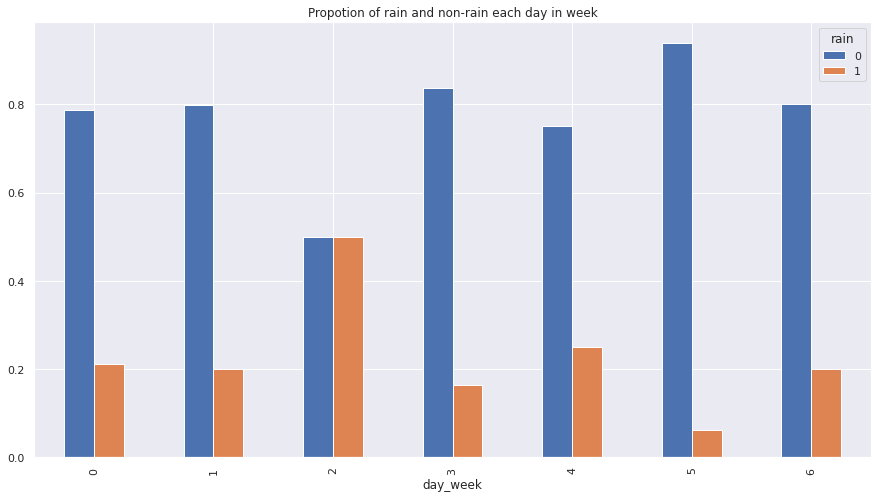

In [17]:
## Check rain frequency
sns.set(rc={'figure.figsize':(15,8)})
temp = nyc_subway[['day_week', 'rain']].groupby(['day_week', 'rain']).rain.count()
temp = temp/temp.groupby(level=0).sum()
temp.unstack().reset_index().plot.bar(x='day_week', y=[0, 1]).set_title('Propotion of rain and non-rain each day in week')

There are multiple latidue-longitude coordinates each station, so create 'lat_lon' column = latitude + longitude

In [18]:
nyc_subway['lat_lon'] = nyc_subway['latitude'].astype(str) + ',' + nyc_subway['longitude'].astype('str')

In [19]:
temp1 = nyc_subway[['DATEn', 'hour', 'rain', 'lat_lon']][nyc_subway.rain==1].groupby(['lat_lon', 'DATEn', 'rain']).rain.sum().unstack(1).reset_index()
temp1

temp2 = nyc_subway[['DATEn', 'hour', 'lat_lon']].groupby(['lat_lon', 'DATEn']).count().unstack(1).reset_index()
temp2

temp = temp1/temp2
temp.mean()

         DATEn   
lat_lon              NaN
hour     05-01-11    NaN
         05-02-11    NaN
         05-03-11    NaN
         05-04-11    1.0
         05-05-11    NaN
         05-06-11    NaN
         05-07-11    NaN
         05-08-11    NaN
         05-09-11    NaN
         05-10-11    NaN
         05-11-11    NaN
         05-12-11    NaN
         05-13-11    NaN
         05-14-11    1.0
         05-15-11    1.0
         05-16-11    1.0
         05-17-11    1.0
         05-18-11    1.0
         05-19-11    1.0
         05-20-11    1.0
         05-21-11    NaN
         05-22-11    NaN
         05-23-11    1.0
         05-24-11    NaN
         05-25-11    NaN
         05-26-11    NaN
         05-27-11    NaN
         05-28-11    NaN
         05-29-11    NaN
         05-30-11    1.0
         05-31-11    NaN
dtype: float64

- First, I count the number of rain per day in each location marked as temp1. Then I count the number of records per day in each location marked as temp2.  Finally, I divide temp1 for temp2 and take mean value over all location in a day (ignore NaNs).  The result in temp variable which indicates the number of rains equals the number of records per day in the same location.
- As can be seen, the rain column is marked as 1 for all hours in a day. So it just indicates whether the day has rain or not. And there are some location has less than 6 records/day (6 hour-poins/day)
- There are 10 rainy days in data.

The precipi is different from each time period in a day. So it may useful than rain column. Using precipi to create new rain variable with precipi > 0 or precipi = 0

In [20]:
nyc_subway['new_rain'] = (nyc_subway.precipi > 0).astype('int')

In [21]:
rain_precipi = nyc_subway[(nyc_subway.rain==1) & (nyc_subway.precipi != 0)].shape[0]
rain_no_precipi = nyc_subway[(nyc_subway.rain==1) & (nyc_subway.precipi == 0)].shape[0]

print("Number of rain records have precipi greater than 0: %d"%rain_precipi)
print("Number of rain records have precipi equal to 0: %d"%rain_no_precipi)

Number of rain records have precipi greater than 0: 2796
Number of rain records have precipi equal to 0: 6789


Text(0.5, 1.0, 'Propotion of rain and non-rain each day in week')

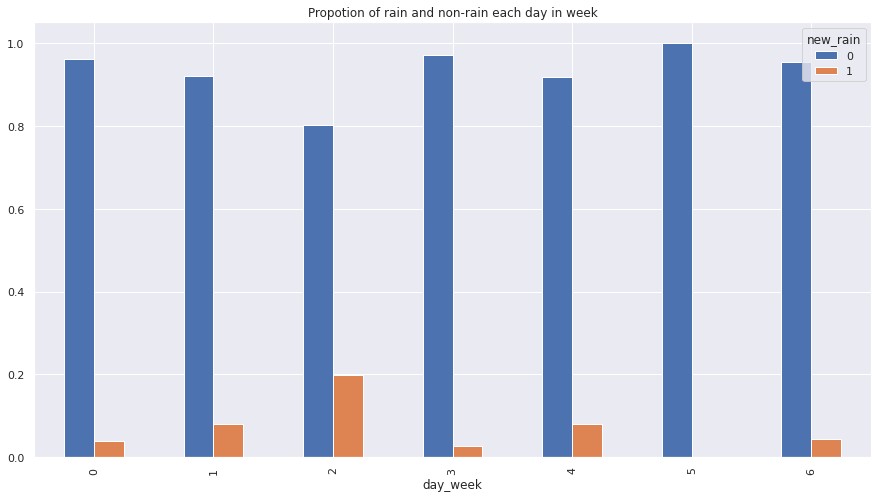

In [22]:
## Check rain frequency
temp = nyc_subway[['day_week', 'new_rain']].groupby(['day_week', 'new_rain']).new_rain.count()
temp = temp/temp.groupby(level=0).sum()
temp.unstack().reset_index().plot.bar(x='day_week', y=[0, 1]).set_title('Propotion of rain and non-rain each day in week')

The propotion of rain is very small in the data.

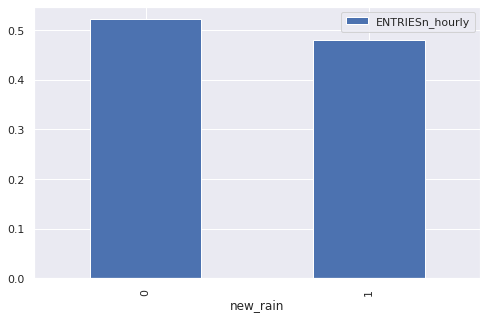

In [23]:
sns.set(rc={'figure.figsize':(8,5)})
temp = nyc_subway[['ENTRIESn_hourly', 'new_rain']].groupby(['new_rain']).ENTRIESn_hourly.mean()
temp = temp/temp.sum()
temp.plot.bar()
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


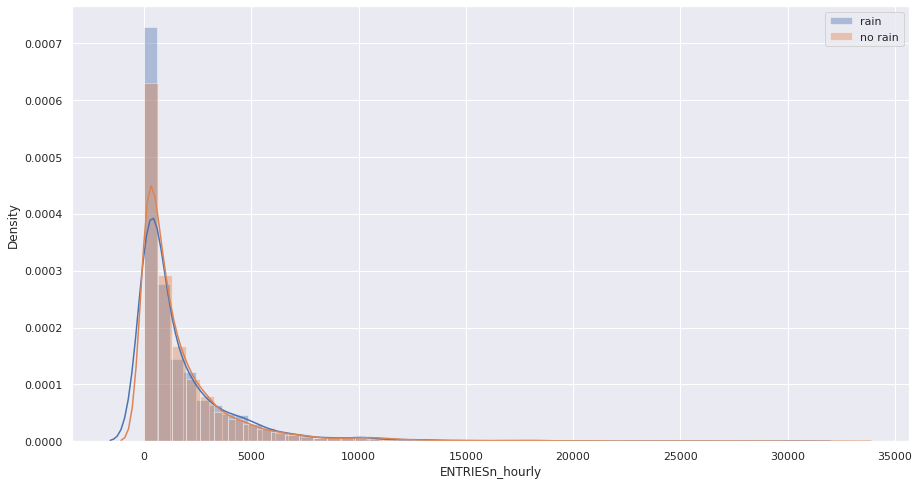

In [24]:
sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(nyc_subway[nyc_subway.new_rain==1].ENTRIESn_hourly, label="rain")
sns.distplot(nyc_subway[nyc_subway.new_rain==0].ENTRIESn_hourly, label='no rain')
plt.legend()

We can use the t-test to see if there is a signification between the mean ridership of rainy day versus non-rainy day. But there are two assumptions must be true: 
- **independent observations**: the data is the record of ridership on rainy days and non-rainy days in the real world so it is independent (True)
- **normally distribution** or **large samples** or **small sample - 2 sides test**: the ENTRIESn_hourly is not normal distribution and the sample data is not large. So, I will use 2 tailed t-test.



*   Null hypothesis: mean of ENTRIESn_hourly (new_rain=1) == mean of ENTRIESn_hourly (new_rain=0)
*   Alternative hypothesis: mean of ENTRIESn_hourly (new_rain=1) != mean of ENTRIESn_hourly (new_rain=0) 
* Significance Level: 0.05

In [25]:
rain_day = nyc_subway[['new_rain', 'ENTRIESn_hourly']][nyc_subway.new_rain==1]
nonrain_day = nyc_subway[['new_rain', 'ENTRIESn_hourly']][nyc_subway.new_rain==0]

ttest_ind(rain_day, nonrain_day)

Ttest_indResult(statistic=array([        inf, -2.66802319]), pvalue=array([0.        , 0.00763278]))

$$ p_{value} = 0.00763278 < \alpha $$
-> Reject null hypothesis, so can conclude that rainy day affects the ridership.

Text(0.5, 1.0, 'ENTRIESn_hourly with different weather conditions on weekend')

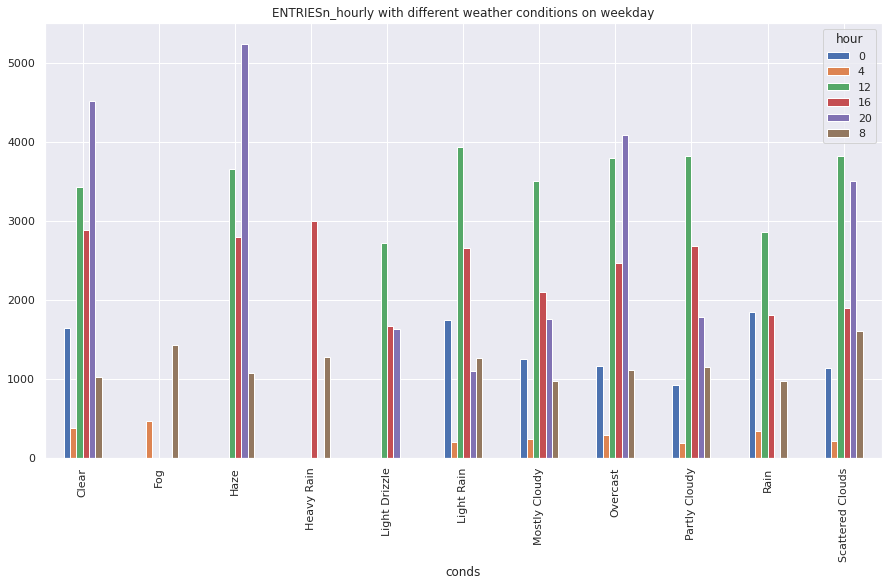

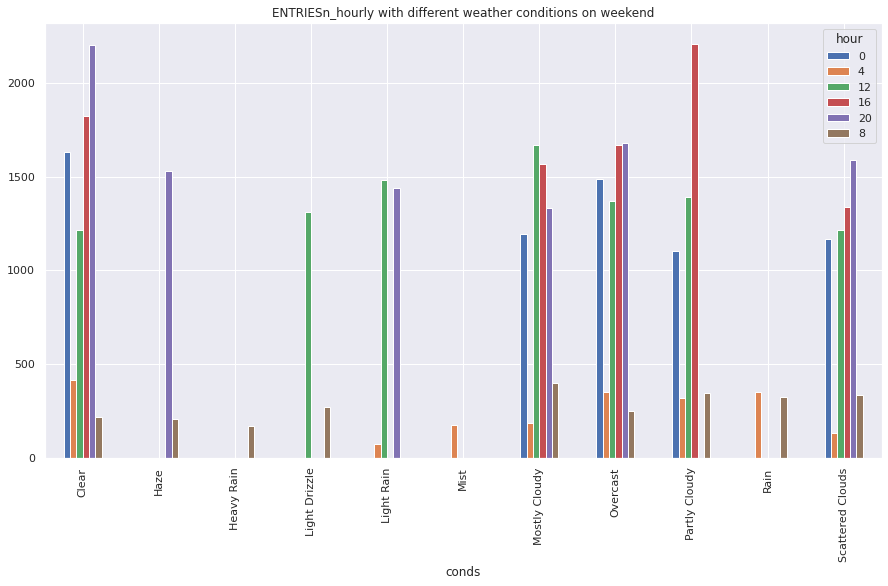

In [26]:
temp = nyc_subway[nyc_subway.weekday==1][['ENTRIESn_hourly', 'conds', 'hour']].groupby(['conds', 'hour']).ENTRIESn_hourly.mean()
temp.unstack().reset_index().plot.bar(x='conds', y=nyc_subway.hour.unique()).set_title('ENTRIESn_hourly with different weather conditions on weekday')
temp = nyc_subway[nyc_subway.weekday==0][['ENTRIESn_hourly', 'conds', 'hour']].groupby(['conds', 'hour']).ENTRIESn_hourly.mean()
temp.unstack().reset_index().plot.bar(x='conds', y=nyc_subway.hour.unique()).set_title('ENTRIESn_hourly with different weather conditions on weekend')

In the weekday, weather conditions would not have a significant effect on ridership as people have to go to work. In contrast, in the weekend, there are some significant effects on the ridership: fewer rides when it's rain/heavy rain and more when it's clear or likely going to rain.

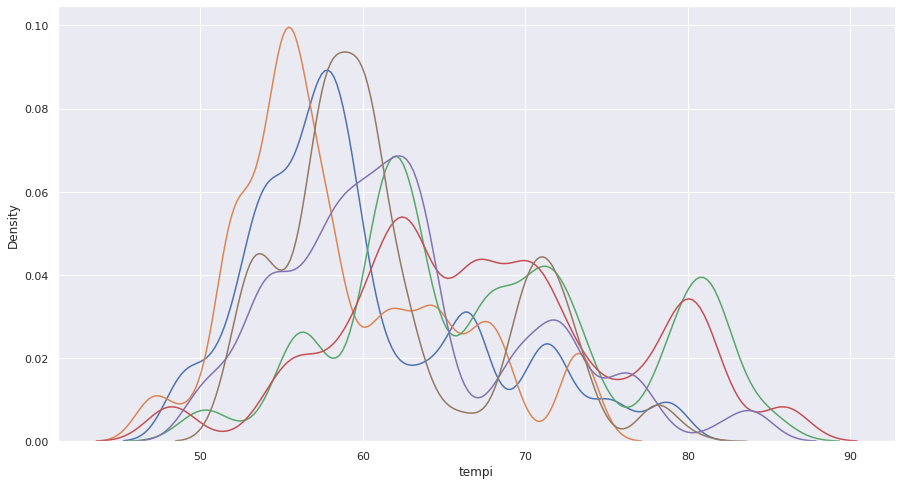

In [27]:
for i in nyc_subway.hour.unique():
  sns.kdeplot(nyc_subway[nyc_subway.hour==i].tempi, label=str(i))

In [28]:
## Pearson Correlation of Features 
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(15, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

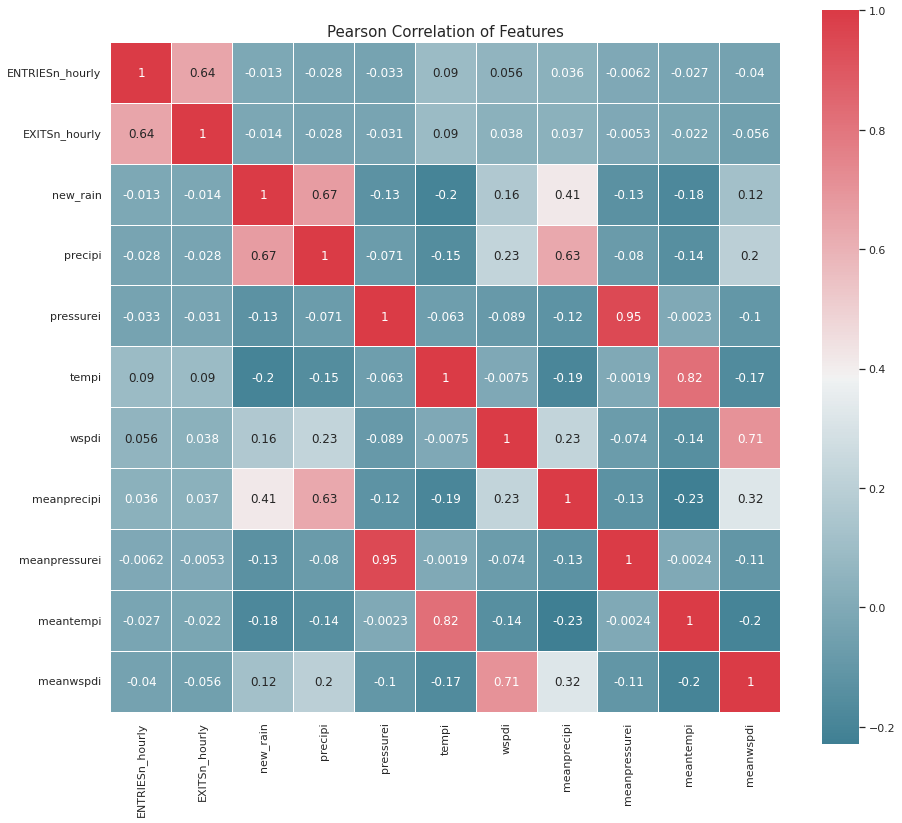

In [29]:
correlation_heatmap(nyc_subway[['ENTRIESn_hourly', "EXITSn_hourly", "new_rain", "precipi", "pressurei", "tempi",	"wspdi",	"meanprecipi",	"meanpressurei",	"meantempi",	"meanwspdi"]])

The Pearson Correlations above shows that weather features don't have strong linear relation with ridership. However, some non-linear relation may exist. So, I can use those features when training the prediction model. Besides, they are also don't have strong linear relation with each others except tempi - meantempi, pressurei - meanpressurei, etc.

**Conclusion** \\
From the t-test, I found that the new rain variable (precipi > 0 or precipi = 0) is significant affect the ridership. The condition variable affects the ridership in the weekend as people normally don't have to go to work, so weather condition has influenced people decision - go out or not. As the small data, it's hard to interpret affection of temperature on ridership rather than the time in a day. After using Pearson Correlation matrix, I found that weather features don't have strong linear relation with ridership but there maybe exist some non-linear relations so I could use those features in the prediction model.